In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from typing import List

from hypothesis_testing_pipeline import *


In [2]:
def print_vector_results(arr: np.ndarray) -> None:
    
    for i in range(arr.shape[0]):
        print(f"Question {i+1}: {arr[i]}")

# Preprocess

In [3]:
data = pd.read_csv('survey_data.csv', header=None)

question_list = []
q_num = 0
for i in range(len(data)):
    if i % 15 == 0:
        q_num += 1
    question_list.append(q_num)
data['Question'] = question_list

col_list = [f'Rater{i}' for i in range(1,13)] + ['Question']
data.columns = col_list

# The creator of the question: Human-made, PCMG, GPT2-based
creators = ['Human-made']*5 + ['PCMG']*5 + ['GPT2-based']*5
creator_list = creators*(len(data)//15)
# The type of data: Solvability or Readability
types = ['Solvability'] + ['Readability']*4
type_list = types*(len(data)//5)
data['Creator'] = creator_list
data['Type'] = type_list

In [4]:
data

,Rater1,Rater2,Rater3,Rater4,Rater5,Rater6,Rater7,Rater8,Rater9,Rater10,Rater11,Rater12,Question,Creator,Type
0,1,2,2,1,2,2,0,2,2,2,1,1,1,Human-made,Solvability
1,4,3,4,4,4,3,4,4,4,4,4,3,1,Human-made,Readability
2,4,4,4,2,4,2,3,4,4,4,2,3,1,Human-made,Readability
3,1,4,4,4,4,2,4,4,4,4,4,4,1,Human-made,Readability
4,4,4,4,3,4,3,2,4,4,4,4,4,1,Human-made,Readability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1,1,1,1,0,1,0,1,0,1,0,0,10,GPT2-based,Solvability
146,0,2,1,4,0,3,3,2,1,2,2,1,10,GPT2-based,Readability
147,0,3,1,3,0,3,4,2,1,1,2,0,10,GPT2-based,Readability
148,0,3,2,4,0,3,3,3,0,1,0,0,10,GPT2-based,Readability


In [5]:
solvability_data = data[data.Type == 'Solvability']
readability_data = data[data.Type == 'Readability']

### Solvability data

In [6]:
human_s = solvability_data[solvability_data.Creator == 'Human-made'].iloc[:,:-3].to_numpy(dtype=float)
pcmg_s = solvability_data[solvability_data.Creator == 'PCMG'].iloc[:,:-3].to_numpy(dtype=float)
gpt2_s = solvability_data[solvability_data.Creator == 'GPT2-based'].iloc[:,:-3].to_numpy(dtype=float)

### Readability data

In [7]:
# all the evaluation scores grouped by creator
human_r = readability_data[readability_data.Creator == 'Human-made'].iloc[:,:-3].to_numpy(dtype=float)
pcmg_r = readability_data[readability_data.Creator == 'PCMG'].iloc[:,:-3].to_numpy(dtype=float)
gpt2_r = readability_data[readability_data.Creator == 'GPT2-based'].iloc[:,:-3].to_numpy(dtype=float)

# Distribution Visualization

## Solvability

In [8]:
solvability_data['ScoreSum'] = solvability_data.sum(axis=1, numeric_only=True)

/tmp/ipykernel_2250329/3409984996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solvability_data['ScoreSum'] = solvability_data.sum(axis=1, numeric_only=True)


In [9]:
solvability_data

,Rater1,Rater2,Rater3,Rater4,Rater5,Rater6,Rater7,Rater8,Rater9,Rater10,Rater11,Rater12,Question,Creator,Type,ScoreSum
0,1,2,2,1,2,2,0,2,2,2,1,1,1,Human-made,Solvability,19
5,1,1,1,1,2,1,0,2,2,2,2,2,1,PCMG,Solvability,18
10,1,0,1,1,0,2,0,0,1,0,0,0,1,GPT2-based,Solvability,7
15,2,2,2,2,2,2,0,2,2,2,2,2,2,Human-made,Solvability,24
20,2,0,2,2,2,1,0,0,2,0,2,2,2,PCMG,Solvability,17
25,2,0,2,2,2,1,0,0,2,0,2,2,2,GPT2-based,Solvability,17
30,1,2,2,2,2,1,0,2,2,2,2,2,3,Human-made,Solvability,23
35,1,0,2,1,2,2,0,2,1,0,2,0,3,PCMG,Solvability,16
40,2,0,1,1,1,1,0,0,0,0,0,0,3,GPT2-based,Solvability,9
45,1,1,2,1,2,1,0,2,2,2,2,2,4,Human-made,Solvability,22


<AxesSubplot:xlabel='Question', ylabel='ScoreSum'>

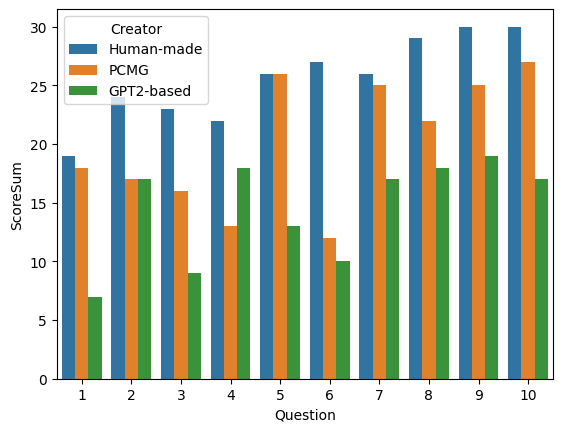

In [10]:
sns.barplot(data=solvability_data, x="Question", y="ScoreSum", hue="Creator")

## Readability

In [11]:
readability_data_sum = readability_data.sum(axis=1, numeric_only=True)
readability_data['ScoreSum'] = readability_data_sum

/tmp/ipykernel_2250329/144105668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readability_data['ScoreSum'] = readability_data_sum


# Statistics

## Mean Score of Each MWP --> 1x10 Vector

In [12]:
# Solvability
human_s_mean_q = human_s.mean(axis=1)
pcmg_s_mean_q = pcmg_s.mean(axis=1)
gpt2_s_mean_q = gpt2_s.mean(axis=1)

In [13]:

def grouped_avg_of_question(arr: np.ndarray, n: int=4) -> np.ndarray:
    result = np.cumsum(arr, 0)[n-1::n]/float(n)
    result[1:] = result[1:] - result[:-1]
    return result

In [14]:
# Readability
human_r_mean_q = grouped_avg_of_question(human_r).mean(axis=1)
pcmg_r_mean_q = grouped_avg_of_question(pcmg_r).mean(axis=1)
gpt2_r_mean_q = grouped_avg_of_question(gpt2_r).mean(axis=1)

In [15]:
print("Human-made Mean")
print_vector_results(human_r_mean_q)

Human-made Mean
Question 1: 3.5833333333333335
Question 2: 3.3958333333333335
Question 3: 3.3541666666666665
Question 4: 2.7083333333333335
Question 5: 3.375
Question 6: 3.4791666666666665
Question 7: 3.1458333333333335
Question 8: 2.875
Question 9: 3.4375
Question 10: 3.5208333333333335


In [16]:
print("PCMG Mean")
print_vector_results(pcmg_r_mean_q)

PCMG Mean
Question 1: 3.25
Question 2: 2.75
Question 3: 2.375
Question 4: 2.1041666666666665
Question 5: 3.3958333333333335
Question 6: 1.1458333333333333
Question 7: 3.4791666666666665
Question 8: 2.125
Question 9: 1.6875
Question 10: 3.1458333333333335


In [17]:
print("GPT2-based Mean")
print_vector_results(gpt2_r_mean_q)

GPT2-based Mean
Question 1: 2.3333333333333335
Question 2: 1.9791666666666667
Question 3: 2.0
Question 4: 2.125
Question 5: 1.1458333333333333
Question 6: 1.25
Question 7: 2.375
Question 8: 3.0208333333333335
Question 9: 3.0
Question 10: 1.5625


## Mean Score of Each Creator --> Scalar

In [18]:
# Solvability
human_s_mean = human_s_mean_q.mean(axis=0)
pcmg_s_mean = pcmg_s_mean_q.mean(axis=0)
gpt2_s_mean = gpt2_s_mean_q.mean(axis=0)
print(f'풀이 가능성 Mean\nHuman-made: {human_s_mean}, PCMG:{pcmg_s_mean}, GPT2-based: {gpt2_s_mean}')

풀이 가능성 Mean
Human-made: 1.675, PCMG:1.2166666666666668, GPT2-based: 0.75


In [19]:
# Readability
human_r_mean = human_r_mean_q.mean(axis=0)
pcmg_r_mean = pcmg_r_mean_q.mean(axis=0)
gpt2_r_mean = gpt2_r_mean_q.mean(axis=0)
print(f'독해 가능성 Mean\nHuman-made: {human_r_mean}, PCMG:{pcmg_r_mean}, GPT2-based: {gpt2_r_mean}')

독해 가능성 Mean
Human-made: 3.2875, PCMG:2.5458333333333334, GPT2-based: 2.0791666666666666


## Std. Dev. of Each MWP --> 1x10 Vector

In [20]:
# Solvability
human_s_std_q = human_s.std(axis=1)
pcmg_s_std_q = pcmg_s.std(axis=1)
gpt2_s_std_q = gpt2_s.std(axis=1)

In [21]:
print("Human-made Std. Dev.")
print_vector_results(human_s_std_q)

Human-made Std. Dev.
Question 1: 0.6454972243679028
Question 2: 0.5527707983925666
Question 3: 0.6236095644623235
Question 4: 0.6454972243679028
Question 5: 0.5951190357119042
Question 6: 0.5951190357119042
Question 7: 0.7592027982620249
Question 8: 0.5951190357119042
Question 9: 0.5951190357119042
Question 10: 0.6236095644623235


In [22]:
print("PCMG Std. Dev.")
print_vector_results(pcmg_s_std_q)

PCMG Std. Dev.
Question 1: 0.6400954789890506
Question 2: 0.924211375534118
Question 3: 0.8620067027323833
Question 4: 0.82915619758885
Question 5: 0.5951190357119042
Question 6: 0.6454972243679028
Question 7: 0.6454972243679028
Question 8: 0.9860132971832694
Question 9: 0.8498365855987975
Question 10: 0.759202798262025


In [23]:
print("GPT2-based Std. Dev.")
print_vector_results(gpt2_s_std_q)

GPT2-based Std. Dev.
Question 1: 0.6454972243679028
Question 2: 0.924211375534118
Question 3: 0.6454972243679028
Question 4: 0.5527707983925666
Question 5: 0.8498365855987976
Question 6: 0.6236095644623235
Question 7: 0.372677996249965
Question 8: 0.3726779962499649
Question 9: 0.3726779962499649
Question 10: 0.4930066485916347


In [24]:
# Readability
human_r_std_q = grouped_avg_of_question(human_r).std(axis=1)
pcmg_r_std_q = grouped_avg_of_question(pcmg_r).std(axis=1)
gpt2_r_std_q = grouped_avg_of_question(gpt2_r).std(axis=1)

## Std. Dev. of Each Creator --> Scalar

In [25]:
# Solvability
human_s_std = human_s_std_q.std(axis=0)
pcmg_s_std = pcmg_s_std_q.std(axis=0)
gpt2_s_std = gpt2_s_std_q.std(axis=0)
print(f'풀이 가능성 Std. Dev.\nHuman-made: {human_s_std}, PCMG:{pcmg_s_std}, GPT2-based: {gpt2_s_std}')

풀이 가능성 Std. Dev.
Human-made: 0.05254111251066237, PCMG:0.1293152123279145, GPT2-based: 0.18405327823045128


In [26]:
# Solvability
human_r_std = human_r_std_q.std(axis=0)
pcmg_r_std = pcmg_r_std_q.std(axis=0)
gpt2_r_std = gpt2_r_std_q.std(axis=0)
print(f'독해 가능성 Std. Dev.\nHuman-made: {human_r_std}, PCMG:{pcmg_r_std}, GPT2-based: {gpt2_r_std}')

독해 가능성 Std. Dev.
Human-made: 0.22105488560882916, PCMG:0.15493416575351088, GPT2-based: 0.12274460527140761


# Hypotheses

In [27]:
hypo_1 = np.concatenate((pcmg_s_mean_q.reshape(1,-1),human_s_mean_q.reshape(1,-1)),axis=0)
hypo_2 = np.concatenate((pcmg_r_mean_q.reshape(1,-1),human_r_mean_q.reshape(1,-1)),axis=0)
hypo_3 = np.concatenate((pcmg_s_mean_q.reshape(1,-1),gpt2_s_mean_q.reshape(1,-1)),axis=0)
hypo_4 = np.concatenate((pcmg_r_mean_q.reshape(1,-1),gpt2_r_mean_q.reshape(1,-1)),axis=0)

# Independence of Oridinal Data

In [28]:
IndependenceTester(hypo_1).print_results()

Statistic: 0.04420736701020686, p-value: 0.903485150200787, Independent?: True


In [29]:
IndependenceTester(hypo_2).print_results()

Statistic: 0.16281598927864993, p-value: 0.6531322621304869, Independent?: True


In [30]:
IndependenceTester(hypo_3).print_results()

Statistic: 0.05724106894344017, p-value: 0.8751946271760626, Independent?: True


In [31]:
IndependenceTester(hypo_4).print_results()

Statistic: -0.15356006255860394, p-value: 0.6718969747216721, Independent?: True


# Hypothesis checking

In [32]:
PAIRED = False
NORMAL = False

In [33]:
HypothesisTester(hypo_1, is_tost=True, is_pair=PAIRED, normality=NORMAL).print_results()

Mann-Whitney U-test TOST
p-value: 0.03859336102623813, reject_alternative: False


In [34]:
HypothesisTester(hypo_2, is_tost=True, is_pair=PAIRED, normality=NORMAL).print_results()

Mann-Whitney U-test TOST
p-value: 0.031818181818181815, reject_alternative: False


In [35]:
HypothesisTester(hypo_3, is_pair=PAIRED, normality=NORMAL).print_results()

Mann-Whitney U-test
statistic: 83.0, p-value: 0.006812668117370378, reject_alternative: False


In [36]:
HypothesisTester(hypo_4, is_pair=PAIRED, normality=NORMAL).print_results()

Mann-Whitney U-test
statistic: 69.5, p-value: 0.0752329756092374, reject_alternative: True


Alternatives

In [37]:
hypo_4_alt = np.concatenate((gpt2_r_mean_q.reshape(1,-1),human_r_mean_q.reshape(1,-1)),axis=0)

In [38]:
HypothesisTester(hypo_4_alt, is_pair=PAIRED, normality=NORMAL).print_results()

Mann-Whitney U-test
statistic: 4.0, p-value: 0.9997801806236867, reject_alternative: True


In [39]:
HypothesisTester(hypo_4_alt, is_tost=True, is_pair=PAIRED, normality=NORMAL).print_results()

Mann-Whitney U-test TOST
p-value: 0.07655947134823016, reject_alternative: True
